**Grand X-Ray Slam**: Division B, the second of a 2-part Kaggle hackathon series where data scientists and AI enthusiasts compete to advance medical imaging. In this challenge, you’ll develop AI models to detect 14 thoracic conditions from chest X-rays, tackling real-world clinical complexity. Your work will power Dr HealthAgent by Blue and Gold Healthcare Inc., enhancing global healthcare.

Top performers across both Division B and Division A will also shine on the Grand Slam Leaderboard, sharing an additional $2,500 prize pool.

Name:**Shams Alkhalidy**

# Dataset Description
The Grand X-Ray Slam Division B dataset contains 108,494 chest X-ray images (~139GB) from three major institutions, designed for multi-label classification of 14 thoracic conditions.

This dataset is Part 2 of the ChestDx-MultiInstitution collection. The other half powers Grand X-Ray Slam: Division A.

**Mission**: build AI models for Dr. HealthAgent to detect thoracic conditions and assist radiologists worldwide.

**Files**

train2.csv – Training labels for ~108,494 images.

train2/ – ~108,494 JPG images (e.g., 000100_001_001.jpg).

test1/ – ~47,927 JPG test images.

**Columns in train2.csv**

- Image_Name – X-ray filename (PatientID_Study_View.jpg).
- Patient_ID – Unique anonymized patient identifier
- Study – Groups X-rays from the same clinical visit.
- Sex – Male / Female (may contain NaNs).
- Age – Patient age (may contain NaNs).
- ViewCategory – Frontal or Lateral.
- ViewPosition – AP / PA / LATERAL.
- 
**14 thoracic conditions (0 = absent, 1 = present):**
- Atelectasis
- Cardiomegaly
- Consolidation
- Edema
- Enlarged Cardiomediastinum
- Fracture
- Lung Lesion
- Lung Opacity
- No Finding
- Pleural Effusion
- Pleural Other
- Pneumonia
- Pneumothorax
- Support Devices
  
**What You’re Predicting: You must detect 14 chest conditions:**

1. Heart issues – Cardiomegaly, Enlarged Cardiomediastinum
2. Lung problems – Pneumonia, Pneumothorax, Lung Opacity
3. Fluid-related – Pleural Effusion, Edema
4. Other – Fracture, Support Devices, No Finding

**Data Provenance**

This dataset is a curated merge of multiple public chest X-ray datasets, fully anonymized and preprocessed to ensure no patient overlap between train and test sets.

**Things to Know**

- Images come from different machines and institutions (style variation).
- Rare conditions (e.g., pneumothorax) → imbalanced labels.
- No patient overlap between train and test.
- Some Sex/Age values missing (NaN).
- Multi-label: one X-ray can show several conditions.

**Tips**

1. Pay attention to rare conditions – they’re the toughest.
2. Conditions often co-occur (e.g., edema + effusion).
3. Medical context matters – don’t treat each label as fully independent.

In [13]:
# Imports
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.image as mpimg
import random

In [2]:
import os
print(os.listdir("/kaggle/input"))

# Path to competition dataset
data_dir = "/kaggle/input/grand-xray-slam-division-b"
# Check what files are inside
print('Filenames of the data', os.listdir(data_dir))

['grand-xray-slam-division-b']
Filenames of the data ['test2', 'sample_submission_2.csv', 'train2.csv', 'train2']


# Load Data

 Each row corresponds to one chest X-ray image.

In [3]:
# Load the training CSV metadata with labels
train = pd.read_csv(f"{data_dir}/train2.csv")

print('Metadata shape:',train.shape)
train.head()

Metadata shape: (108494, 21)


,Image_name,Patient_ID,Study,Sex,Age,ViewCategory,ViewPosition,Atelectasis,Cardiomegaly,Consolidation,...,Enlarged Cardiomediastinum,Fracture,Lung Lesion,Lung Opacity,No Finding,Pleural Effusion,Pleural Other,Pneumonia,Pneumothorax,Support Devices
0,00000003_001_001.jpg,3,1,Male,41.0,Frontal,AP,0,1,0,...,1,0,0,1,0,0,0,0,0,0
1,00000004_001_001.jpg,4,1,Female,20.0,Frontal,PA,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,00000004_001_002.jpg,4,1,Female,20.0,Lateral,Lateral,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,00000006_001_001.jpg,6,1,Female,42.0,Frontal,AP,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,00000010_001_001.jpg,10,1,Female,50.0,Frontal,PA,0,0,0,...,0,0,0,0,1,0,0,0,0,0


# Map images to metdata
map images of Xray to the metadata of labels

In [4]:
# Add full path to each image (new column:filepath )
train["filepath"] = train["Image_name"].apply(lambda x: os.path.join(data_dir, "train2", x))
train.head()

,Image_name,Patient_ID,Study,Sex,Age,ViewCategory,ViewPosition,Atelectasis,Cardiomegaly,Consolidation,...,Fracture,Lung Lesion,Lung Opacity,No Finding,Pleural Effusion,Pleural Other,Pneumonia,Pneumothorax,Support Devices,filepath
0,00000003_001_001.jpg,3,1,Male,41.0,Frontal,AP,0,1,0,...,0,0,1,0,0,0,0,0,0,/kaggle/input/grand-xray-slam-division-b/train...
1,00000004_001_001.jpg,4,1,Female,20.0,Frontal,PA,0,0,0,...,0,0,0,1,0,0,0,0,0,/kaggle/input/grand-xray-slam-division-b/train...
2,00000004_001_002.jpg,4,1,Female,20.0,Lateral,Lateral,0,0,0,...,0,0,0,1,0,0,0,0,0,/kaggle/input/grand-xray-slam-division-b/train...
3,00000006_001_001.jpg,6,1,Female,42.0,Frontal,AP,0,0,0,...,0,0,0,1,0,0,0,0,0,/kaggle/input/grand-xray-slam-division-b/train...
4,00000010_001_001.jpg,10,1,Female,50.0,Frontal,PA,0,0,0,...,0,0,0,1,0,0,0,0,0,/kaggle/input/grand-xray-slam-division-b/train...


# Dataset Summary

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108494 entries, 0 to 108493
Data columns (total 22 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Image_name                  108494 non-null  object 
 1   Patient_ID                  108494 non-null  int64  
 2   Study                       108494 non-null  int64  
 3   Sex                         93829 non-null   object 
 4   Age                         93829 non-null   float64
 5   ViewCategory                108494 non-null  object 
 6   ViewPosition                108494 non-null  object 
 7   Atelectasis                 108494 non-null  int64  
 8   Cardiomegaly                108494 non-null  int64  
 9   Consolidation               108494 non-null  int64  
 10  Edema                       108494 non-null  int64  
 11  Enlarged Cardiomediastinum  108494 non-null  int64  
 12  Fracture                    108494 non-null  int64  
 13  Lung Lesion   

In [6]:
print(train.isna().sum())  #Missing Values

Image_name                        0
Patient_ID                        0
Study                             0
Sex                           14665
Age                           14665
ViewCategory                      0
ViewPosition                      0
Atelectasis                       0
Cardiomegaly                      0
Consolidation                     0
Edema                             0
Enlarged Cardiomediastinum        0
Fracture                          0
Lung Lesion                       0
Lung Opacity                      0
No Finding                        0
Pleural Effusion                  0
Pleural Other                     0
Pneumonia                         0
Pneumothorax                      0
Support Devices                   0
filepath                          0
dtype: int64


In [7]:
total_images = len(train)
total_patients = train['Patient_ID'].nunique()
total_studies = train['Study'].nunique()
print(f"Total Images: {total_images}")
print(f"Total Patients: {total_patients}")
print(f"Total Studies: {total_studies}")

Total Images: 108494
Total Patients: 32077
Total Studies: 184


# Label Prevelance Analysis
Analyze the distribution of the 14 conditions to identify class imbalance

In [8]:
# Class imbalance
label_cols = ['Atelectasis','Cardiomegaly','Consolidation','Edema','Enlarged Cardiomediastinum',
              'Fracture','Lung Lesion','Lung Opacity','No Finding','Pleural Effusion',
              'Pleural Other','Pneumonia','Pneumothorax','Support Devices']
# Calculate counts and percentages for each condition
label_counts = train[label_cols].sum()
label_percentages = (label_counts / total_images * 100).round(2)
prevalence_df = pd.DataFrame({
    'Condition': label_counts.index,
    'Count': label_counts.values,
    'Percent (%)': label_percentages.values
}).sort_values(by='Count', ascending=False)

# Display prevalence table
print("Label Prevalence:")
print(prevalence_df)

Label Prevalence:
                     Condition  Count  Percent (%)
7                 Lung Opacity  49022        45.18
0                  Atelectasis  38613        35.59
4   Enlarged Cardiomediastinum  37566        34.62
13             Support Devices  37385        34.46
1                 Cardiomegaly  34980        32.24
9             Pleural Effusion  34569        31.86
8                   No Finding  34365        31.67
2                Consolidation  29644        27.32
3                        Edema  26567        24.49
5                     Fracture  14578        13.44
11                   Pneumonia  14316        13.20
6                  Lung Lesion  12357        11.39
12                Pneumothorax   8738         8.05
10               Pleural Other   6931         6.39


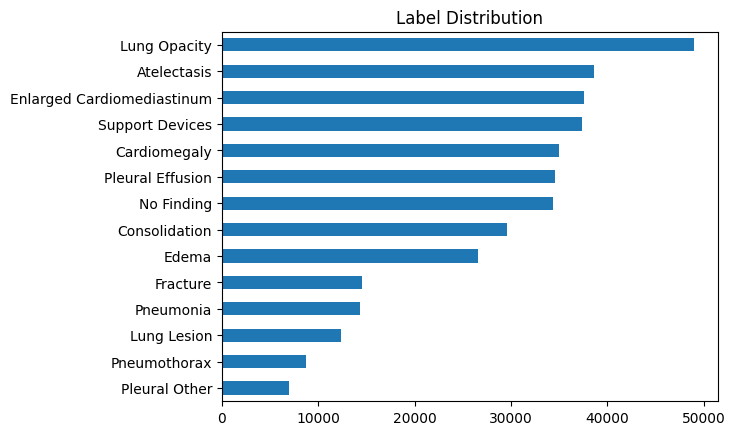

In [9]:
train[label_cols].sum().sort_values().plot(kind="barh")
plt.title('Label Distribution')
plt.show()
# Pleural Other condition is pretty rare and Lung Opacity is common among patients

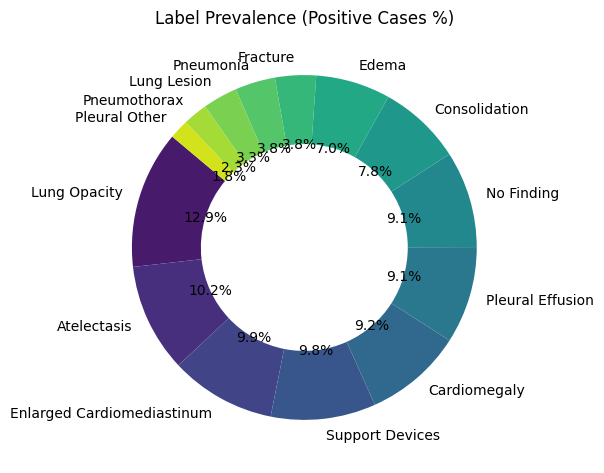

In [10]:
# Donut chart for label percentages
plt.figure(figsize=(6, 6))
colors = sns.color_palette('viridis', len(prevalence_df)) #Generates a list of colors using the viridis colormap from Seaborn.

# prevalence_df['Count'] = number of positive cases per condition
plt.pie(prevalence_df['Count'], labels=prevalence_df['Condition'],
        autopct=lambda pct: f'{pct:.1f}%', startangle=140, colors=colors,
        wedgeprops={'width': 0.4})

plt.title('Label Prevalence (Positive Cases %)')
plt.tight_layout()
plt.savefig('/content/label_percent_donut.jpg')
plt.show()

# Multi-Label Pattens
Examine number of conditions that occur per Xray Image

In [11]:
# calculate number of labels per image
train['label_count'] = train[label_cols].sum(axis=1)      # axis=1 to sum accross columns
multi_labelcount= train['label_count'].value_counts().sort_index()
multi_label_perc = (multi_labelcount/total_images *100).round(2)

# Display mult-label distribution
print('Multi-label distribution')
print(pd.DataFrame({
                    "Number of Labels": multi_labelcount.index,
                    "Count": multi_labelcount.values,
                    "Percentage": multi_label_perc.values
}))

Multi-label distribution
    Number of Labels  Count  Percentage
0                  1  52859       48.72
1                  2   9305        8.58
2                  3   5912        5.45
3                  4   4685        4.32
4                  5   4028        3.71
5                  6   3907        3.60
6                  7   6905        6.36
7                  8  12765       11.77
8                  9   4529        4.17
9                 10   2797        2.58
10                11    706        0.65
11                12     96        0.09


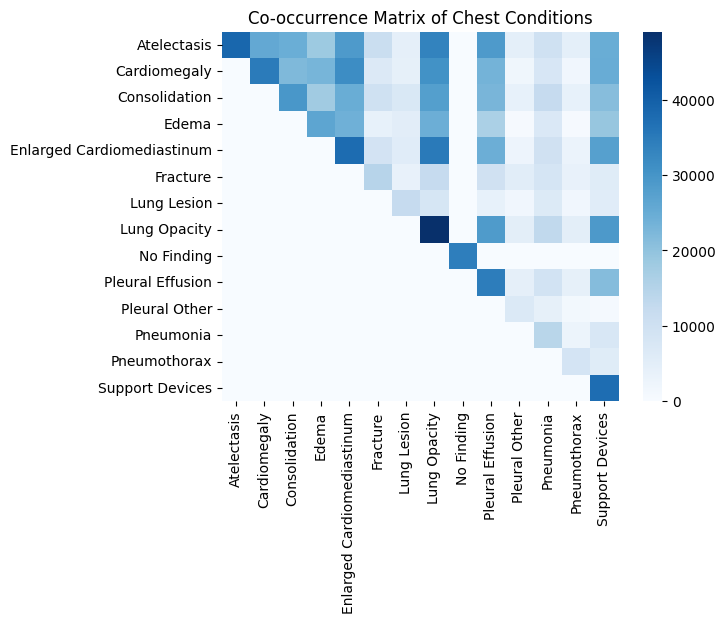

In [14]:
# Co-occurrence matrix → which labels tend to appear together.
# Initialize empty matrix
co_matrix = np.zeros((len(label_cols), len(label_cols)))

# Fill it
for i, col1 in enumerate(label_cols):
    for j, col2 in enumerate(label_cols):
        if i <= j:  # fill upper triangle (matrix is symmetric)
            co_matrix[i, j] = ((train[col1] == 1) & (train[col2] == 1)).sum()

# Convert to DataFrame for nicer display
co_matrix_df = pd.DataFrame(co_matrix, index=label_cols, columns=label_cols)

sns.heatmap(co_matrix_df, annot=False, cmap="Blues")
plt.title("Co-occurrence Matrix of Chest Conditions")
plt.show()
# co_matrix_df

           Type  Count
0  Single Label  52859
1   Multi-Label  55635


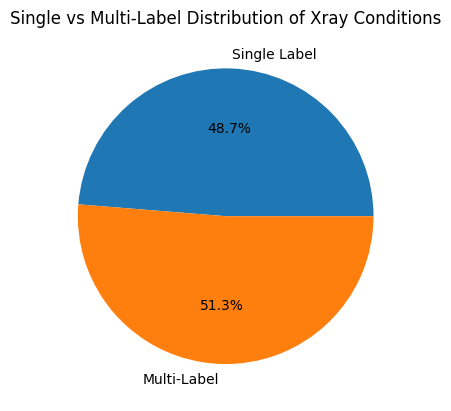

In [15]:
# Visualizing Single label vs Multi-label distribution among X-ray Training data
single_label_count = (train['label_count']==1).sum()
multi_label_count = (train['label_count']>1).sum()

# put into a dataframe
label_dist= pd.DataFrame({'Type':['Single Label','Multi-Label'],
                               'Count': [single_label_count,multi_label_count]})
print(label_dist)

plt.pie(label_dist['Count'], labels = label_dist['Type'], autopct="%1.1f%%")
plt.title('Single vs Multi-Label Distribution of Xray Conditions')
plt.show()

                             Type  Count
0  Single Label(Excl. No Finding)  18494
1   Multi-Label(Excl. No Finding)  55635


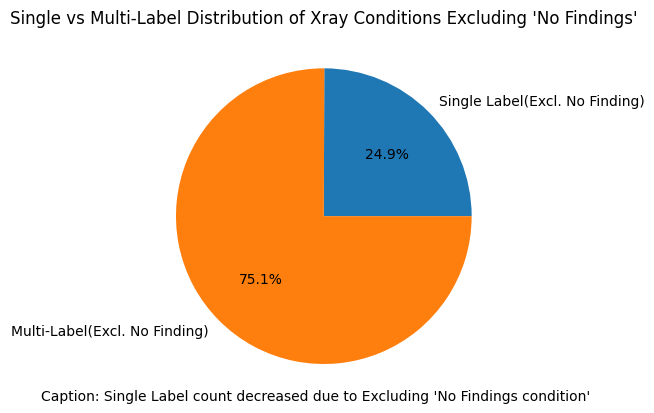

In [16]:
# Display Multi-label Patterns excluding the No Findings Xray conditions
filtered_df = train[(train['label_count'] >=1) & (train['No Finding'] == 0)]

single_label_count = (filtered_df['label_count']==1).sum()
multi_label_count = (filtered_df['label_count']>1).sum()

# put into a dataframe
label_dist= pd.DataFrame({'Type':['Single Label(Excl. No Finding)','Multi-Label(Excl. No Finding)'],
                               'Count': [single_label_count,multi_label_count]})
print(label_dist)

plt.pie(label_dist['Count'], labels = label_dist['Type'], autopct="%1.1f%%")
plt.title("Single vs Multi-Label Distribution of Xray Conditions Excluding 'No Findings'")
plt.figtext(0.5,0.112,"Caption: Single Label count decreased due to Excluding 'No Findings condition'",ha='center')
plt.show()

# Demographic Insights
- Analyze Sex and Age distribution and their relations to conditions

In [17]:
valid_ages = train['Age'].dropna()

valid_age_count = valid_ages[(valid_ages>=0) & (valid_ages<=120)].count()
nan_age_count = train['Age'].isna().sum()
invalid_age_count = valid_ages[(valid_ages<0) | (valid_ages>120)].count()

print(f'Images with Valid age :{valid_age_count}')
print(f'Images with missing age:{nan_age_count}')
print(f'Images with invalid Age:{invalid_age_count}')


Images with Valid age :93829
Images with missing age:14665
Images with invalid Age:0


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


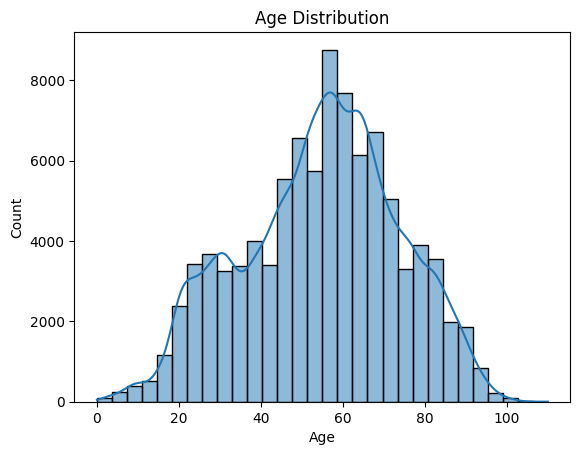

In [18]:
# Demographic Distribution 
# Age
sns.histplot(train['Age'].dropna(), bins=30, kde=True)
plt.title('Age Distribution')
plt.savefig('/content/age_distribution.jpg')
plt.show()
# age distribution looks normal (centered ~55–60)

Distribution among train data of: Sex
Male       54504
Female     39325
Unknown    14665
Name: count, dtype: int64


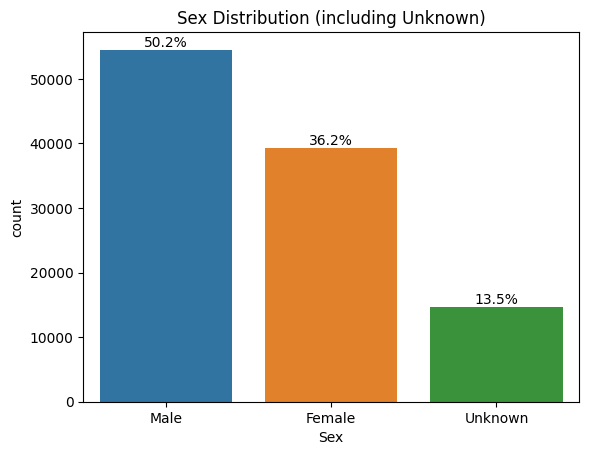

In [19]:
# Sex Dist
sex_for_count = train['Sex'].fillna('Unknown')

print('Distribution among train data of:',sex_for_count.value_counts())  # balanced ratio of Sex

ax = sns.countplot(x=sex_for_count)
total = len(train)
for p in ax.patches:
    count = p.get_height()
    perc = f'{100*count/total:.1f}%'
    ax.annotate(perc, (p.get_x() + p.get_width() / 2., count),
                ha='center', va='bottom', fontsize=10, color='black')
    
plt.title('Sex Distribution (including Unknown)')
plt.savefig('/content/sex_distribution.jpg')
plt.show()

/tmp/ipykernel_36/4182579387.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  condition_count_perAgeGroup = train.groupby('Age_Group')[label_cols].apply(lambda x: (x==1).sum() )


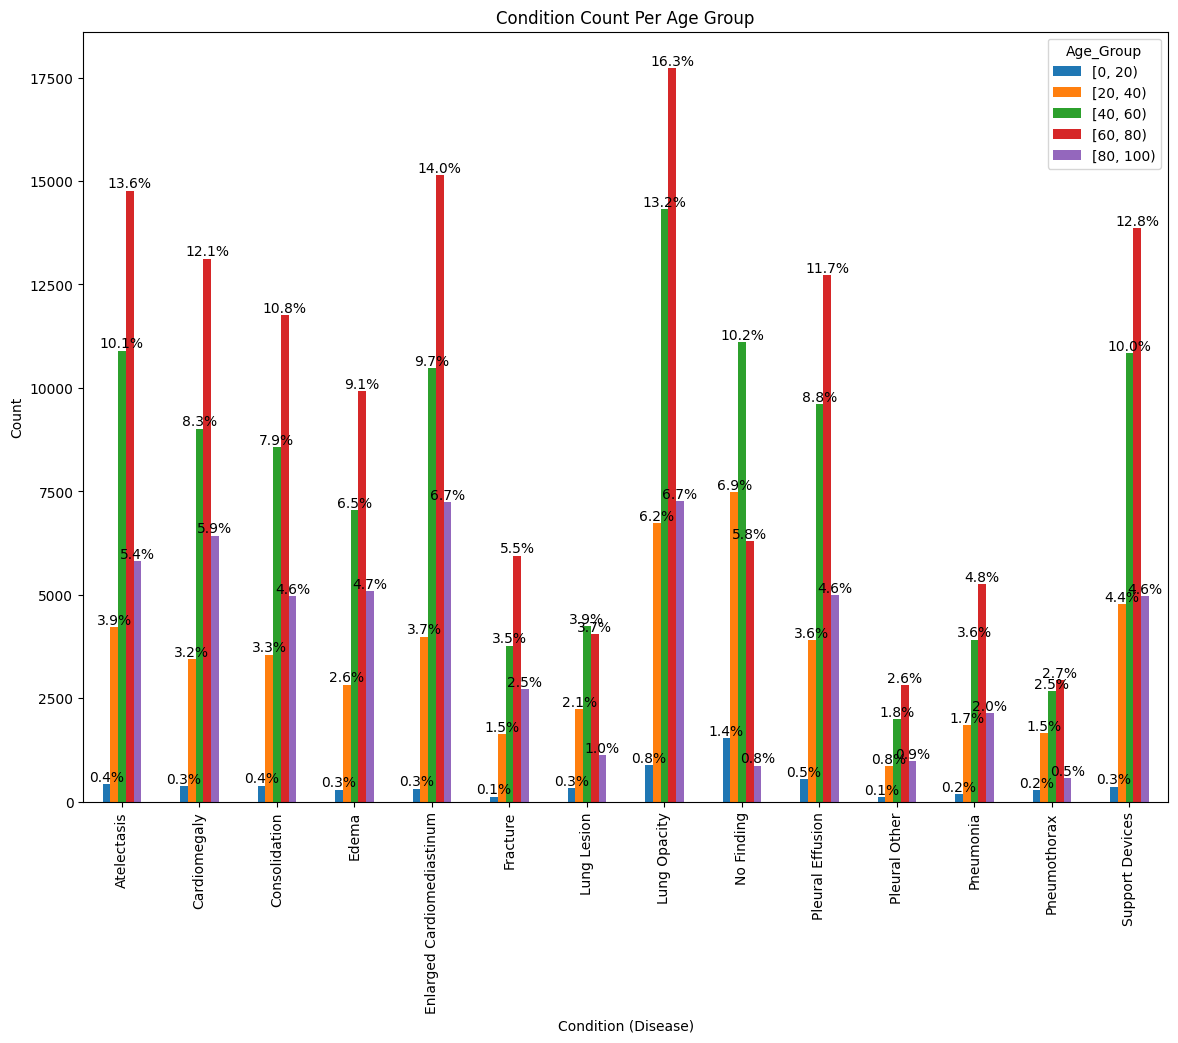

In [20]:
# Condition Count by Age group
age_bins = [0, 20, 40, 60, 80, 100]
# pd.cut() → makes age bins
train['Age_Group'] = pd.cut(train['Age'], bins = age_bins, right = False)
# counts of each condition by age group.
condition_count_perAgeGroup = train.groupby('Age_Group')[label_cols].apply(lambda x: (x==1).sum() )

ax = condition_count_perAgeGroup.T.plot(kind='bar',stacked=False,figsize=(14,10))
# The percentage label above each bar tells you the proportion of the entire dataset that falls into that (condition, age group) combination.
total = len(train)
for p in ax.patches:
    count = p.get_height()
    perc = f'{100*count/total:.1f}%'
    ax.annotate(perc, (p.get_x() + p.get_width() / 2., count),
                ha='center', va='bottom', fontsize=10, color='black')
    
plt.title('Condition Count Per Age Group')
plt.xlabel('Condition (Disease)')
plt.ylabel('Count')
plt.savefig('/content/condition_count_per_age_group.jpg')
plt.show()

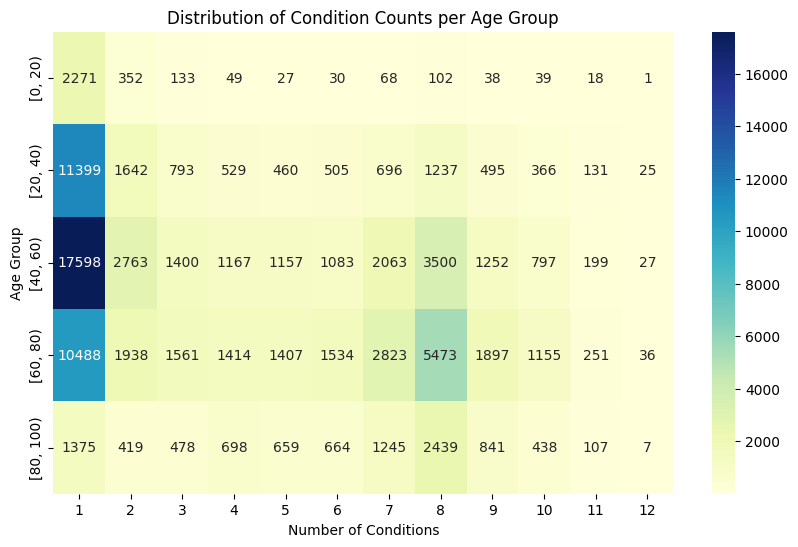

In [21]:
# Distribution of Multi-Labels per Age Group
# Cross-tabulate
age_condition_dist = pd.crosstab(train["Age_Group"], train["label_count"])

plt.figure(figsize=(10,6))
sns.heatmap(age_condition_dist, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Distribution of Condition Counts per Age Group")
plt.xlabel("Number of Conditions")
plt.ylabel("Age Group")
plt.show()


# Image View Breakdown

In [22]:
train.head()

,Image_name,Patient_ID,Study,Sex,Age,ViewCategory,ViewPosition,Atelectasis,Cardiomegaly,Consolidation,...,Lung Opacity,No Finding,Pleural Effusion,Pleural Other,Pneumonia,Pneumothorax,Support Devices,filepath,label_count,Age_Group
0,00000003_001_001.jpg,3,1,Male,41.0,Frontal,AP,0,1,0,...,1,0,0,0,0,0,0,/kaggle/input/grand-xray-slam-division-b/train...,4,"[40, 60)"
1,00000004_001_001.jpg,4,1,Female,20.0,Frontal,PA,0,0,0,...,0,1,0,0,0,0,0,/kaggle/input/grand-xray-slam-division-b/train...,1,"[20, 40)"
2,00000004_001_002.jpg,4,1,Female,20.0,Lateral,Lateral,0,0,0,...,0,1,0,0,0,0,0,/kaggle/input/grand-xray-slam-division-b/train...,1,"[20, 40)"
3,00000006_001_001.jpg,6,1,Female,42.0,Frontal,AP,0,0,0,...,0,1,0,0,0,0,0,/kaggle/input/grand-xray-slam-division-b/train...,1,"[40, 60)"
4,00000010_001_001.jpg,10,1,Female,50.0,Frontal,PA,0,0,0,...,0,1,0,0,0,0,0,/kaggle/input/grand-xray-slam-division-b/train...,1,"[40, 60)"


Unique Image View Categories:{'Frontal', 'Lateral'}


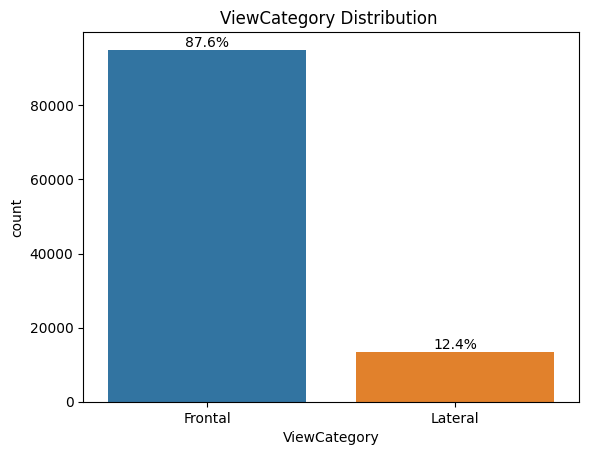

In [23]:
# ViewCategory 
print(f'Unique Image View Categories:{set(train["ViewCategory"])}')
ax = sns.countplot(x=train['ViewCategory'])

total = len(train)
for p in ax.patches:
    count = p.get_height()
    perc = f'{100*count/total:.1f}%'
    ax.annotate(perc, (p.get_x() + p.get_width() / 2., count),
                ha='center', va='bottom', fontsize=10, color='black')

plt.title('ViewCategory Distribution ')
plt.show()
# ViewCategory feature is inbalanced; More commonly to have ViewCateogry = Frontal images


Unique Image View Positions:{'PA', 'LL', 'Lateral', 'AP'}


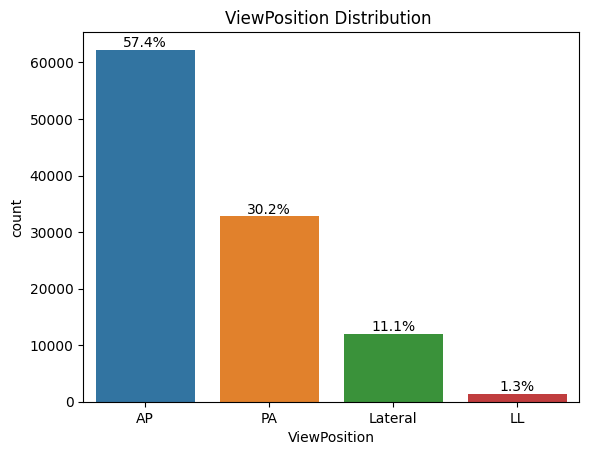

In [24]:
# ViewPosition
print(f'Unique Image View Positions:{set(train["ViewPosition"])}')
ax = sns.countplot(x=train['ViewPosition'])

total = len(train)
for p in ax.patches:
    count = p.get_height()
    perc = f'{100*count/total:.1f}%'
    ax.annotate(perc, (p.get_x() + p.get_width() / 2., count),
                ha='center', va='bottom', fontsize=10, color='black')
plt.title('ViewPosition Distribution ')
plt.show()
# Rare ViewPosition= LL , Commone ViewPosition=AP

# Visual Exploration
- First map the images files to the train.csv metadata so we have a filepath linked to each image data.
- visualize some of the Xray images

In [25]:
# Add full path to each image (new column:filepath )
train["filepath"] = train["Image_name"].apply(lambda x: os.path.join(data_dir, "train2", x))
train.head()

,Image_name,Patient_ID,Study,Sex,Age,ViewCategory,ViewPosition,Atelectasis,Cardiomegaly,Consolidation,...,Lung Opacity,No Finding,Pleural Effusion,Pleural Other,Pneumonia,Pneumothorax,Support Devices,filepath,label_count,Age_Group
0,00000003_001_001.jpg,3,1,Male,41.0,Frontal,AP,0,1,0,...,1,0,0,0,0,0,0,/kaggle/input/grand-xray-slam-division-b/train...,4,"[40, 60)"
1,00000004_001_001.jpg,4,1,Female,20.0,Frontal,PA,0,0,0,...,0,1,0,0,0,0,0,/kaggle/input/grand-xray-slam-division-b/train...,1,"[20, 40)"
2,00000004_001_002.jpg,4,1,Female,20.0,Lateral,Lateral,0,0,0,...,0,1,0,0,0,0,0,/kaggle/input/grand-xray-slam-division-b/train...,1,"[20, 40)"
3,00000006_001_001.jpg,6,1,Female,42.0,Frontal,AP,0,0,0,...,0,1,0,0,0,0,0,/kaggle/input/grand-xray-slam-division-b/train...,1,"[40, 60)"
4,00000010_001_001.jpg,10,1,Female,50.0,Frontal,PA,0,0,0,...,0,1,0,0,0,0,0,/kaggle/input/grand-xray-slam-division-b/train...,1,"[40, 60)"


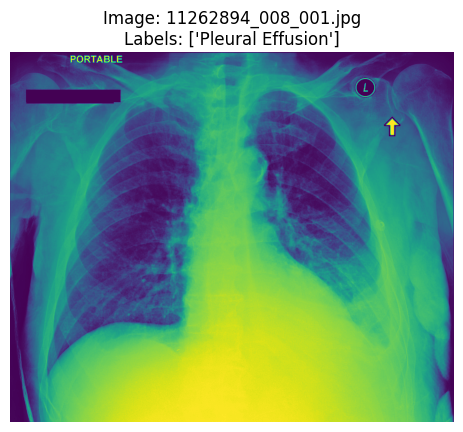

In [36]:
# Display an image with labels
# pick a random image
idx = random.randint(0,len(train)-1)
img_path = train.iloc[idx]['filepath']  # filepath mapping to the Xray
labels = train.iloc[idx][label_cols]   # conditions that this image have (will change each time this code is rerun)

# Show the image
img = mpimg.imread(img_path)  # loads image as numpy array
plt.imshow(img)
plt.title(f"Image: {train.iloc[idx]['Image_name']}\nLabels: {list(labels[labels==1].index)}")
plt.axis('off')
plt.show()

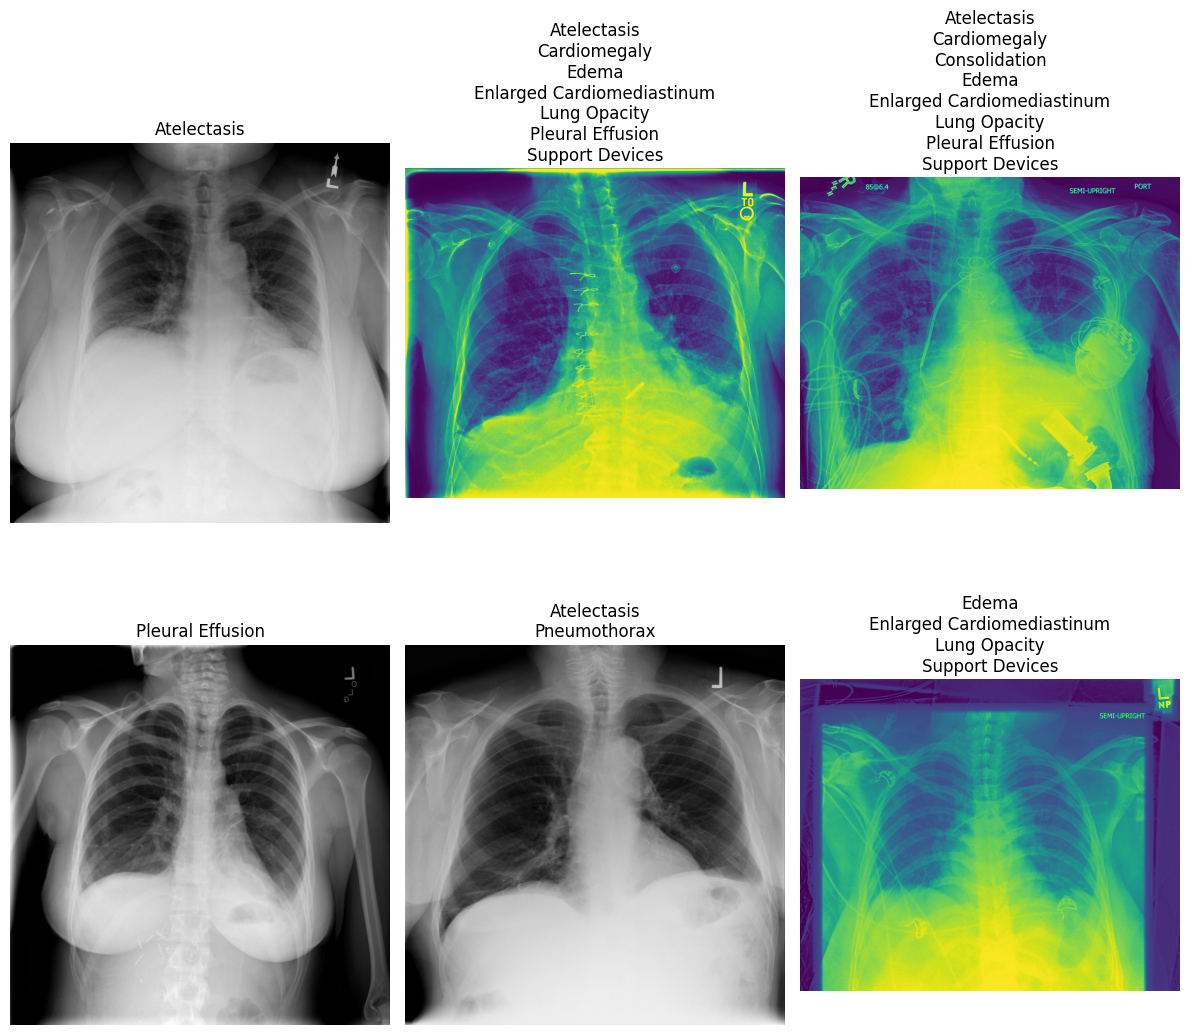

In [39]:
# scan through different X-rays and directly see the multi-label conditions
# Display 6 images
fig, axes = plt.subplots(2,3, figsize=(12,12))
for ax in axes.ravel():
    idx = random.randint(0, len(train)-1)
    img_path = train.iloc[idx]['filepath']
    img = mpimg.imread(img_path)

    # get labels
    labels = train.iloc[idx][label_cols]
    conditions = [c for c, v in labels.items() if v == 1]  #grab conditions that are positve in labels

    ax.imshow(img)
    ax.set_title("\n".join(conditions))
    ax.axis('off')
plt.tight_layout()
plt.show()

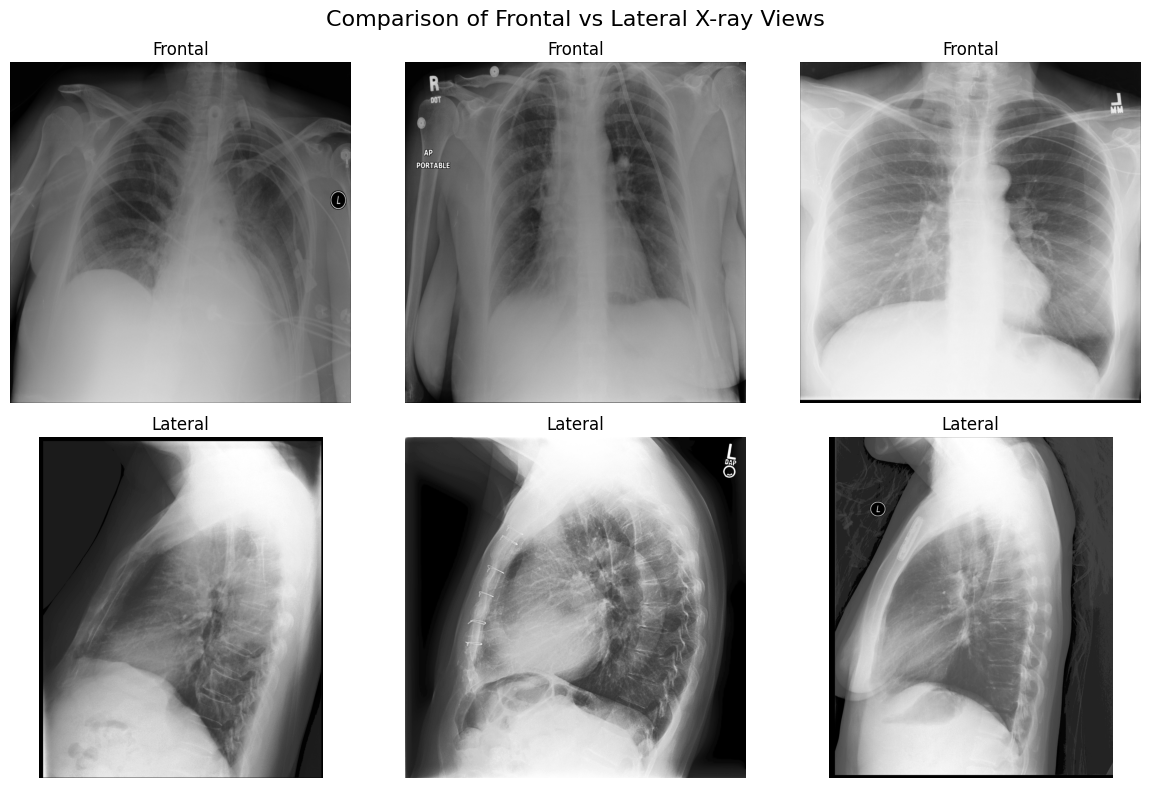

In [40]:
# Separate frontal and lateral filepaths
frontal_imgs = train[train['ViewCategory'] == 'Frontal']['filepath'].tolist()
lateral_imgs = train[train['ViewCategory'] == 'Lateral']['filepath'].tolist()

# Pick random samples
sample_frontal = random.sample(frontal_imgs, 3)
sample_lateral = random.sample(lateral_imgs, 3)

# Plot
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

for i, fp in enumerate(sample_frontal):
    axes[0, i].imshow(mpimg.imread(fp), cmap='gray')
    axes[0, i].set_title("Frontal")
    axes[0, i].axis("off")

for i, fp in enumerate(sample_lateral):
    axes[1, i].imshow(mpimg.imread(fp), cmap='gray')
    axes[1, i].set_title("Lateral")
    axes[1, i].axis("off")

plt.suptitle("Comparison of Frontal vs Lateral X-ray Views", fontsize=16)
plt.tight_layout()
plt.show()

# Data Integrity Checks
- Verify uniqueness of Patient_IDs and Image_Names and check for metadate inconsistenicies

In [48]:
# check for image duplication 
dup_imgs = train['Image_name'].duplicated().sum()
print('Count of duplicated image entries:', dup_imgs)

# check for Patient_IDS duplicates
duplicated_patients = len(train) - train['Patient_ID'].nunique() # total_imgs - total_patients
print('Duplicated Patient_ID entries: ',dup_PatientIDs)

# invalid Age values
invalid_ages = train['Age'].dropna()
invalid_ages = invalid_ages[invalid_ages < 0].count()
print('Invalid Age values (<0):', invalid_ages)

Count of duplicated image entries: 0
Duplicated Patient_ID entries:  76417
Invalid Age values (<0): 0


# Key Findings
- **Dataset Size** 108,494 images, 32,077 total patients, and 184 studies
- **Label Imbalance**: Lung Opacity (45.18%), Atelectasis (35.59%) are dominant conditions; Pleural Other (6.39%) and Pneumothorax (8.05%) are rare.
- **Mulit-Label Complexity**: ~75% of images have muliple poisitive labels, requiring multi-label modeling.
- **Demogrphics**: Sex distribution balancd (~50% male/female ratio, assumed), Age distribution is normal with median Age ~50. Use Sex/Age as features.
- **Image Views:** Frontal ViewCategory views are dominant (>80%), as well as ViewPositions: AP, Pa, and Lateral. Stratify by view for better performance.
  

# Machine Learning Models
- First, train using a baseline model
- Imrove the baseline